# Exercise 5: Explore Kernel SVC

In this notebook we will review concepts of kernel support vector classifier and demostrate them in scikit-learn.
We will do that by fitting Gaussian Kernel SVC to a simulated dataset.

### Dataset

The dataset consist of 9 1D feature vectors, with labels -1 and 1. Run the code below to create and plot the dataset. 

Note function `PlotData`, you will need it later.

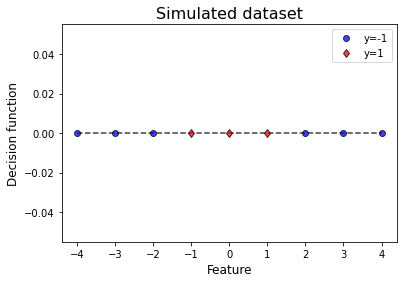

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# SIMULATED DATASET
# feature vector
x = np.linspace(-4,4,9).reshape(-1,1)
# all samples have zero y coordinate
x0 = np.zeros(9)
# Label lector consists of -1 and 1 labels
y = -np.ones(9)
y[3:6]=1

# PLOT DATA
def PlotData():
    
    # plot zero axis
    plt.plot(x,x0,'k--', alpha=0.75)
    
    # plot dataset with labels shown by different markers 
    plt.plot(x[y==-1],x0[y==-1],'bo',alpha = 0.75, markeredgecolor='k', label = 'y=-1')
    plt.plot(x[y==1],x0[y==1],'rd',alpha = 0.75, markeredgecolor='k', label = 'y=1')
    
    # annotate the plot
    plt.legend(loc = 'upper right')
    plt.title('Simulated dataset', fontsize = 16)
    plt.xlabel('Feature', fontsize = 12)
    plt.ylabel('Decision function', fontsize = 12)
    
PlotData()

### Task 1: Decision function

Next, let's fit the `SVC` model with a Gaussian kernel and plot the decision function. Decision function can be predicted directly from the fitted `SVC` model.

Complete the code and the function `PlotDecisionFunction` to do that. Note that the decision function is non-linear. You can use values `C=1e5` and `gamma=0.1`

Text(0.5, 1.0, 'Decision function')

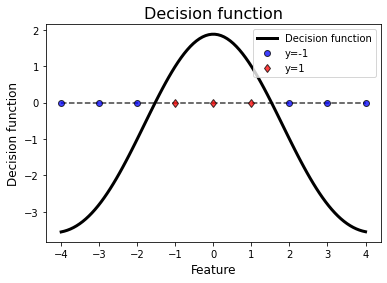

In [2]:
from sklearn.svm import SVC

def PlotDecisionFunction():
    
    # create feature space
    Feature_space = np.linspace(-4,4,100).reshape(-1,1)
    # predict decision function
    df = model.decision_function(Feature_space)
    # plot decision function
    plt.plot(Feature_space,df,'k-',label='Decision function', linewidth = 3)

# parameters
C=1e5
gamma = 0.1
    
# create the model
model = SVC(kernel='rbf', C=C, gamma=gamma)

# fit the model
model.fit(x,y)

# Plot decision function 
PlotDecisionFunction()

# Plot data
PlotData()

# annotate
plt.title('Decision function', fontsize = 16)

In order to understand how this decision function is created, let's recall from the lecture how the decision function $h(x)$ is expressed using the **dual representation** $\mathbf{a}=(a_1,...,a_N)$:
$$h(x)=\sum_{i,a_i>0}a_iy_i\kappa(x,x_i)+b$$
Non-zero elements $a_i$ of the dual representation $\mathbf{a}$ correspond the **support vectors** $x_i$. Labels $y_i$ take values -1 or 1, $\kappa(x,x_i)$ is a kernel (in our case Gaussian) placed around the support vectors and $b$ is the intercept. Let's now recreate the decision function ourselves from the fitted SVC model that we have already created and is now stored in variable `model`.

### Task 2: Support vectors

The support vectors of the fitted `SVC` model can be found using `support_vectors_`. Note that it is a 2D array. 

Run the cell to see the support vectors. Note that they are all non-zero and they are fewer than the number of datapoints. How many do we have?

In [3]:
# print support vectors. Printing transposed vector.
print('Support vectors: ', model.support_vectors_.T)

Support vectors:  [[-2.  2. -1.  1.]]


The indices of the support vector are in `support_` which is again a 2D array. Note that they are not in order.

In [4]:
# print indices of support vectors. Printing transposed vector.
print('Indices of support vectors: ', model.support_.T)

Indices of support vectors:  [2 6 3 5]


We are now ready to plot our support vectors $x_i$. Complete the function `PlotSupportVectors` and the other code to do that.

Text(0.5, 1.0, 'Support vectors')

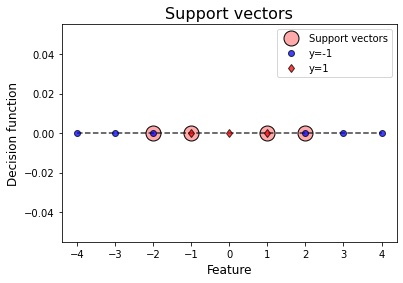

In [5]:
def PlotSupportVectors():
    # support vectors
    sv = model.support_vectors_
    # array of zeros of the same shape
    sv0 = np.zeros(model.support_vectors_.shape)
    # plot support vectors
    plt.plot(sv,sv0,'ro', label = 'Support vectors', markersize = 15, alpha = 1, markeredgecolor='k',c='#FFAAAA')
    
# plot support vectors
PlotSupportVectors()

# plot data
PlotData()

# annotate
plt.title('Support vectors', fontsize = 16)

### Task 3: Gaussian kernels

The decision function is a linear combination of the kernels $\kappa(x,x_i)$ placed around the support vectors $x_i$ for which $a_i>0$. We will now plot these kernels.

In the cell below there is the function `GaussianKernel` that returns values of $\kappa(x,x_i)$ for a vector $x$. Run the cell.

In [6]:
# a function to calculate the kernel is prepared for you
from scipy.stats import norm
def GaussKernel(f,mu,sigma):
    kernel = norm.pdf((f-mu)/sigma)
    kernel = kernel/norm.pdf(0)
    return kernel

Now we will plot the kernels placed around the support vectors. Complete the code below to do that.

Text(0.5, 1.0, 'Kernels $\\kappa(x,x_i)$')

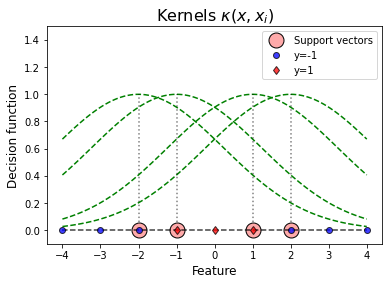

In [7]:
def PlotKernels():
    # number of support vectors
    n = model.support_vectors_.shape[0]
    
    # sigma
    sigma = np.sqrt(1/(2*gamma))
    
    # create feature space
    Feature_space = np.linspace(-4,4,100).reshape(-1,1)
    
    # loop over support vectors to generate kernels
    for i in range(n):
        # evaluate kernel for the whole feature space
        kernel = GaussKernel(Feature_space,model.support_vectors_[i],sigma)
        # plot kernel
        plt.plot(Feature_space,kernel,'g--')
        # connecting line to the corresponding support vector
        plt.plot([model.support_vectors_[i],model.support_vectors_[i]],[0,1],'k:', alpha=0.5)
        
# Plot kernels
PlotKernels() 

# Plot support vectors
PlotSupportVectors()

# Plot data
PlotData()

# annotate
plt.ylim([-0.1,1.5])
plt.title(r'Kernels $\kappa(x,x_i)$', fontsize = 16)

### Task 4: Dual representation

Dual representation is stored in the fitted `SVC` model as `dual_coef_`. In fact its elements correspond to $a_iy_i$ for the support vectors only ($a_i>0$).

In [8]:
print('Dual coefficients: ', np.around(model.dual_coef_,1))

Dual coefficients:  [[-8. -8.  8.  8.]]


The intercept $b$ is stored at `model.intercept_`

In [9]:
print('Intercept: ',np.around(model.intercept_,1))

Intercept:  [-1.9]


We can plot dual representation by putting support vectors on x axis and the dual coefficient of y axis

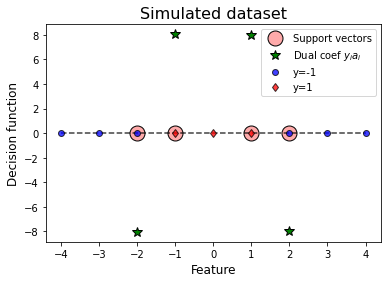

In [10]:
def PlotDualCoef():
    # support vectors
    sv = model.support_vectors_
    # dual coeffs
    dc = model.dual_coef_[0]
    # plot dual coeffs
    plt.plot(sv,dc ,'g*', 
             label = 'Dual coef $y_ia_i$', markersize = 10, markeredgecolor='k')

PlotSupportVectors()
PlotDualCoef()
PlotData()

### Task 5: My own decision function

The decision function is evaluated as sum over all support vector indices $i$ of $a_iy_i$ times $\kappa(x,x_i)$ with the intercept $b$ added to it as well.

Complete the code below to evaluate and plot the decision function

Text(0.5, 1.0, 'My own decision function')

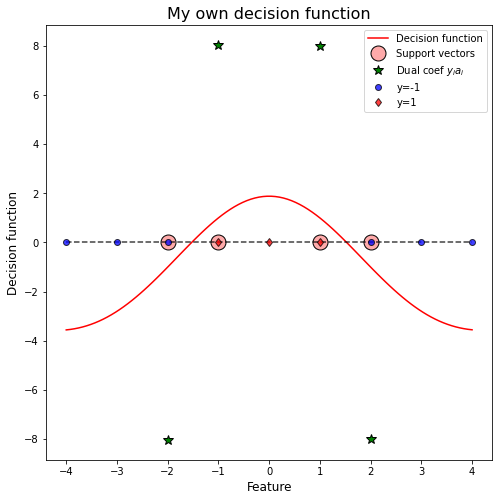

In [11]:
def MyDecisionFunction():
    # number of support vectors
    n = model.support_vectors_.shape[0]
    
    # sigma
    sigma = np.sqrt(1/(2*gamma))
    
    # create feature space
    Feature_space = np.linspace(-4,4,100).reshape(-1,1)
    
    # Initialise decision function as zero vector
    df = np.zeros(Feature_space.shape)
    
    # loop over support vectors to 
    # 1. generate kernels
    # 2. multiply them with dual coefficients
    # 3. add them to the decision function
    
    for i in range(n):
        # evaluate kernel for the whole feature space
        kernel = GaussKernel(Feature_space,model.support_vectors_[i],sigma)
        # multiply by dual coeficient
        kernel = kernel*model.dual_coef_[0][i]
        # add to the decision function
        df = df+kernel
    
    # add intercept
    df = df + model.intercept_[0]
    
    # plot
    plt.plot(Feature_space,df,'r', label = 'Decision function')

    
# figure
plt.figure(figsize = (8,8))

# plot my own decision function
MyDecisionFunction()

# Plot support vectors
PlotSupportVectors()

# Plot dual coefs
PlotDualCoef()

# Plot data
PlotData()

# annotate 
plt.title('My own decision function', fontsize = 16)